###### World Happiness Report 2023

## Selected World Hapiness Report

The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by the Gallup World Poll data, released a dataset of World Happiness Report 2023.
This dataset contains a selection of diferrent countries for each state effectiveness, for the years 2008 - 2022.

A detailed description of the dataset can be found on [World Happiness's website](https://worldhappiness.report/ed/2023/) using Data for Table 2.1 as main and Data for Figure 2.1 for support, but to summarize, the dataset has the following variables:
- Country name
- year
- Life Ladder : Happiness score or subjective well-being (variable name ladder), the survey with steps numbered from 0 at the
    bottom to 10 at the top
- Log GDP per capita : The statistics of GDP per capita (variable name gdp) in purchasing power parity
    (PPP)
- Social support : (or having someone to count on in times of trouble) is the national average of the binary responses (either 0 
    or 1)  to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever 
    you need them, or not?”
- Healthy life expectancy at birth : based on the data extracted from the World Health Organization’s (WHO)
- Freedom to make life choices : the national average of responses to the GWP question “Are you satisfied or dissatisfied with 
    your freedom to choose what you do with your life?”
- Generosity : is the residual of regressing national average of response to the GWP question “Have you donated money to a 
    charity in the past month?” on GDP per capita
- Perceptions of corruption : The measure is the national average of the survey responses to two questions in the GWP: “Is 
    corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” 
- Positive affect : is defined as the average of three positive affect measures in GWP: laugh, enjoyment and doing interesting 
    things in the Gallup World Poll waves 3-7
- Negative affect : is defined as the average of three negative affect measures in GWP. They are worry, sadness and anger, respectively

## Objective

In this notebook, we are going to analyze World Happiness Report 2023 data collected. The dataset contains information about the amount of countries across several categories. We are going to find the answers to questions as following:

Document 1: EDA
- Importing and Exploring Data
- Data Wrangling (Dealing with Duplicates, Missing values)
- Exploratory Data analysis
    1. What is the average amount of ladder score by countries?    
- Visualization the question:
    2. Which country owns the highest happiness score and the top 10 ranking?
    3. Which country owns the least happinesss score and the last 10 ranking?
    4. What is the effect between Perceptions of corruption and Freedom to make life choices?
    5. Comparison of Log GDP per capita and Healthy life expectancy at birth?
    6. Creating a dashboard in Tableau

##### Document 2: Model Evaluation (This doc.)
- Exploratory Data analysis
    1. What is the high correlation with life ladder(happiness score)?
- Model Development
    2. What Regression model is suit to predicting the life lader?
- Model Evaluation and Refinement
    3. How to make a prediction on new data?

# Load Data

In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in the data

df = pd.read_excel(r"C:\Users\Lenovo\World_Happiness_2023_2.xlsx")
df.head(40)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326


# Explore data analysis

### 1.1 Correlation and Cousation

### Correlation

In [3]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [4]:
df.isnull().value_counts()

Country name  year   Life Ladder  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect
False         False  False        False               False           False                             False                         False       False                      False            False              2178
dtype: int64

### Pearson Correlation
Pearson Correlation measures the linear dependence between two variables X and Y (resualting coefficient is a value between -1 and 1, 1: perfect positive linear correlation, 0: No linear correlation, -1: Perfect negative linear corrlation)

In [5]:
# Correlation

df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.047910,0.077718,-0.028521,0.161895,0.230144,0.004680,-0.082500,0.023155,0.200977
Life Ladder,0.047910,1.000000,0.785343,0.722970,0.705634,0.528843,0.183529,-0.449873,0.518475,-0.337694
Log GDP per capita,0.077718,0.785343,1.000000,0.683986,0.819633,0.365504,0.003792,-0.383834,0.241551,-0.250572
Social support,-0.028521,0.722970,0.683986,1.000000,0.593563,0.407987,0.069055,-0.231487,0.438086,-0.435428
Healthy life expectancy at birth,0.161895,0.705634,0.819633,0.593563,1.000000,0.368516,0.025220,-0.314547,0.210256,-0.148716
Freedom to make life choices,0.230144,0.528843,0.365504,0.407987,0.368516,1.000000,0.321056,-0.483308,0.580416,-0.269774
Generosity,0.004680,0.183529,0.003792,0.069055,0.025220,0.321056,1.000000,-0.277214,0.309619,-0.078885
Perceptions of corruption,-0.082500,-0.449873,-0.383834,-0.231487,-0.314547,-0.483308,-0.277214,1.000000,-0.283069,0.251160
Positive affect,0.023155,0.518475,0.241551,0.438086,0.210256,0.580416,0.309619,-0.283069,1.000000,-0.332699
Negative affect,0.200977,-0.337694,-0.250572,-0.435428,-0.148716,-0.269774,-0.078885,0.251160,-0.332699,1.000000


Text(95.7222222222222, 0.5, 'categories')

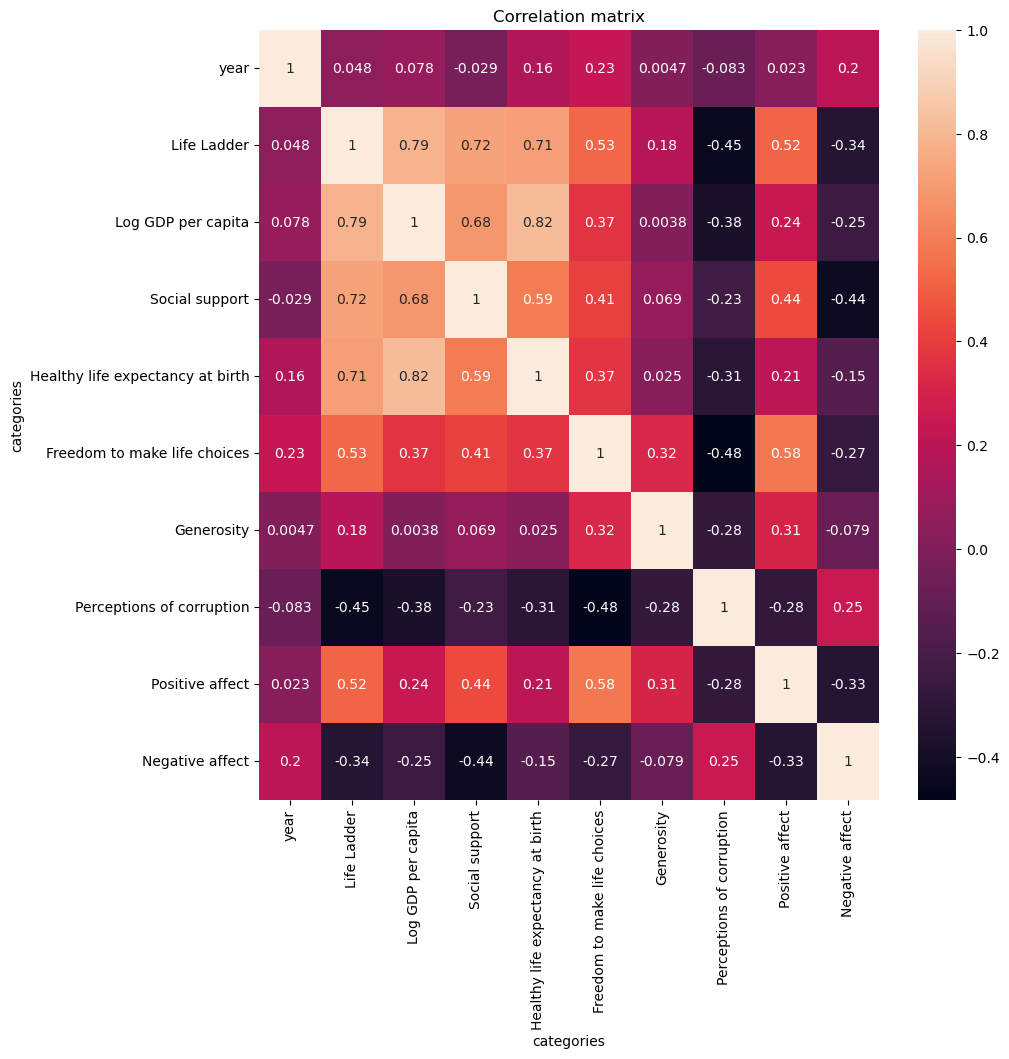

In [6]:
# make it easy to see with heatmap

correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation matrix')
plt.xlabel('categories')
plt.ylabel('categories')

Conclusion: The most correlation is between Log GDP per capita and Healthy life expectancy at birth. However, if we are looking at Life Ladder, the high correlation variables are Log GDP per capita, Social support and Healthy life expectancy at birth. So, It's assumed that Log GDP per capita is the most impact variables for Life Ladder.

#### Continuous Numerical Variables between Life Ladder and Log GDP per capita

#### Positive Linear Relationship

(0.0, 8.355817407369614)

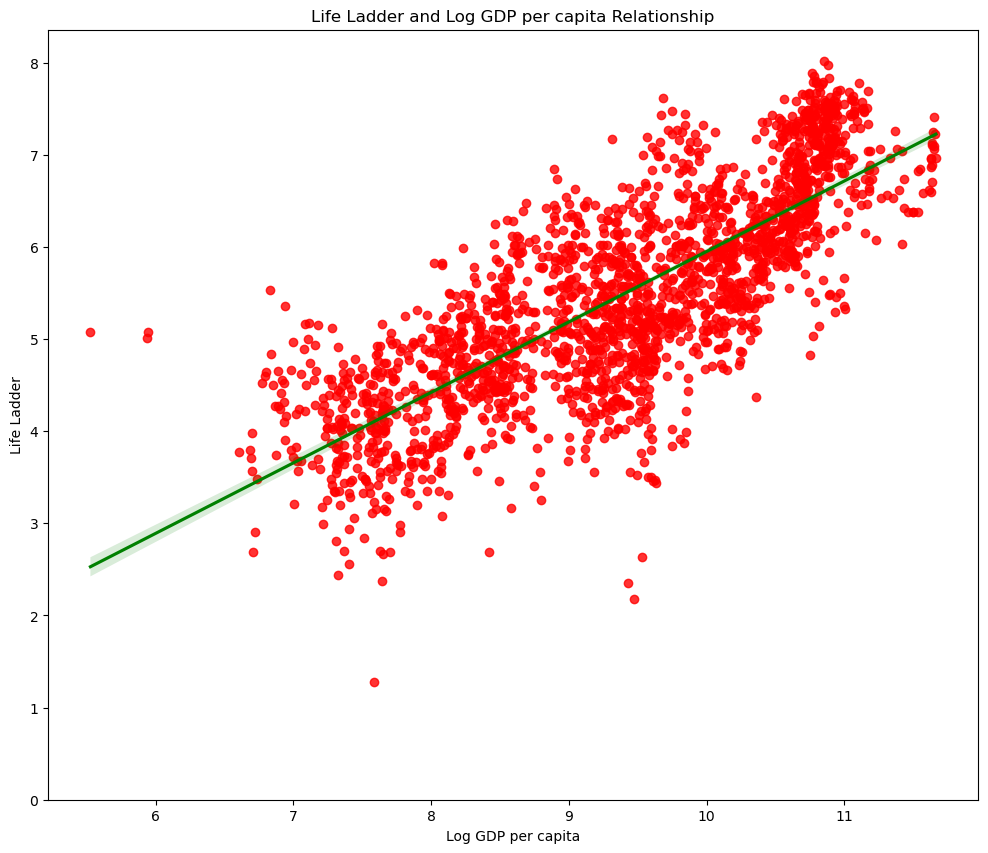

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.regplot(x=df['Log GDP per capita'], y=df['Life Ladder'], data=df, scatter_kws={'color':'red'}, line_kws={'color':
                                                                                                         'green'})
plt.title('Life Ladder and Log GDP per capita Relationship')
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')
plt.ylim(0,)  #start at origin point

In [8]:
df[['Log GDP per capita','Life Ladder']].corr()

,Log GDP per capita,Life Ladder
Log GDP per capita,1.000000,0.785343
Life Ladder,0.785343,1.000000


Next, let's determine that that most colleration (the linear dependence between two variables as pearson colleration) varible is the probability value that the correlation between these two variables is statistically significally by P-value.

### P-value

The probability of devidence that the correlation is significant. Nomally, we choose significant level of 0.05, which mean 95% confident that the correlation between the variables is significant.

In [9]:
from scipy import stats

In [10]:
# Calculate the Pearson Correlation Coefficient and P-value of Life Ladder and Log GDP per capita

pearson_coef, p_value = stats.pearsonr(df['Log GDP per capita'], df['Life Ladder'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of P =', p_value)

The Pearson Correlation Coefficient is 0.7853426837217938 with a P-value of P = 0.0


In [11]:
# To see P-value, divide data into bins or groups and compute the Pearson correlation coefficient and p-value

# Set the number of bins and bin size
num_bins = 11
bin_size = len(df) // num_bins

# Loop over the bins and compute Pearson correlation coefficient and p-value for each bin
for i in range(num_bins):
    start_index = i * bin_size
    end_index = (i+1) * bin_size
    bin_data = df[start_index:end_index]
    pearson_coef, p_value = stats.pearsonr(bin_data['Log GDP per capita'], bin_data['Life Ladder'])
    print(f"Bin {i+1}: Pearson correlation coefficient = {pearson_coef}, p-value = {p_value}")


Bin 1: Pearson correlation coefficient = 0.8742874532035316, p-value = 1.949767932407571e-63
Bin 2: Pearson correlation coefficient = 0.7421113303626112, p-value = 6.74245301943585e-36
Bin 3: Pearson correlation coefficient = 0.715479363404482, p-value = 2.3524607297362653e-32
Bin 4: Pearson correlation coefficient = 0.7358903833854333, p-value = 4.950458258064764e-35
Bin 5: Pearson correlation coefficient = 0.7535728094561474, p-value = 1.4672270415114425e-37
Bin 6: Pearson correlation coefficient = 0.7748762836834988, p-value = 6.612000932606489e-41
Bin 7: Pearson correlation coefficient = 0.8124856308279949, p-value = 8.177387521836902e-48
Bin 8: Pearson correlation coefficient = 0.8178735820410437, p-value = 6.241400933239549e-49
Bin 9: Pearson correlation coefficient = 0.8517961975509011, p-value = 6.200760773346464e-57
Bin 10: Pearson correlation coefficient = 0.870522143670636, p-value = 2.8993373929183334e-62
Bin 11: Pearson correlation coefficient = 0.8211559413130067, p-value

In [12]:
#To see ways to be 0.00 is to loop over cumulative bins, where each bin includes the data from all the previous bins

# Set the number of bins
num_bins = 11

# Loop over the cumulative bins and compute Pearson correlation coefficient and p-value for each bin
for i in range(num_bins):
    bin_data = df.iloc[:bin_size*(i+1)]    # eg. (bin size = 197) * (num_bins = 0 + 1) = 197*(0+1) = 197 rows then 197*(1+1) = 394 rows
    pearson_coef, p_value = stats.pearsonr(bin_data['Log GDP per capita'], bin_data['Life Ladder'])
    print(f"Cumulative Bin {i+1}: Pearson correlation coefficient = {pearson_coef}, p-value = {p_value}")


Cumulative Bin 1: Pearson correlation coefficient = 0.8742874532035316, p-value = 1.949767932407571e-63
Cumulative Bin 2: Pearson correlation coefficient = 0.8067942883350061, p-value = 4.5031394583386204e-92
Cumulative Bin 3: Pearson correlation coefficient = 0.7837333607292246, p-value = 1.4843336805259637e-124
Cumulative Bin 4: Pearson correlation coefficient = 0.7710396367091034, p-value = 5.26054614245984e-157
Cumulative Bin 5: Pearson correlation coefficient = 0.7661510365824317, p-value = 6.3928468206693355e-192
Cumulative Bin 6: Pearson correlation coefficient = 0.763758826038496, p-value = 1.0468897149534925e-227
Cumulative Bin 7: Pearson correlation coefficient = 0.768426906385235, p-value = 1.3801310247190311e-270
Cumulative Bin 8: Pearson correlation coefficient = 0.7694637214794713, p-value = 2.42893429127156e-310
Cumulative Bin 9: Pearson correlation coefficient = 0.7712987300624123, p-value = 0.0
Cumulative Bin 10: Pearson correlation coefficient = 0.782374873528753, p-v

Conslusion: The P-value is < 0.001, the correlation between Log GDP per capita and Life Ladder is statistically significant, and the linear relationship is very strong (around 0.7853).

###  <font color='blue'>- - - Answer for Question 1 The highest variable effected with Life Ladder (Happiness score)? <font>

So, the highest variable effected with Life Ladder (Happiness score) is Log GDP per capita. We now have the variable to take into account when predicting the Life Ladder.

Now we move into building machine learning models to automate our analysis, feeding the model with variable that meaningfully affect our targat variable will improve our model's prediction performance

In [13]:
#How can I determine a fair value for Life Ladder?

# Model Development

From the scatter plot, we can see a roughly linear relationship between Log GDP per capita and Life Ladder. Therefore, we can start by fitting a simple linear regression model to the data:

## 1. Linear Regression and Multiple Linear Regression

### Simple Linear Regression
Method to help us understand the relationship between two variables (X: Predeictore/independent variable, Y: Response/dependence variable(that we want to predict):

The result is Linear Function:  Yhat = a + bX  (a: intercept(the value of Y when X=0), b: slope(the value which Y changes when X increase by 1 unit)

In [14]:
# Load the moduls for linear regression

from sklearn.linear_model import LinearRegression

In [15]:
# Create linear regression object

lm = LinearRegression()
lm

LinearRegression()

In [16]:
# To look how Log GDP per capita help us predict Life Ladder. 
# Using simple linear regression,create 'Log GDP per capita' as predictor variable and 'Life Ladder' as Response variable

X = df[['Log GDP per capita']]  #inframe
Y = df['Life Ladder']   #in list

In [17]:
# Fit the linear model using 'Log GDP per capita'

lm.fit(X,Y)

LinearRegression()

In [18]:
# Output a prediction:

Yhat = lm.predict(X)
Yhat[0:5]

array([3.92326428, 4.04429809, 4.12480918, 4.09984134, 4.16045928])

In [19]:
#Find the value of intercept(a)
lm.intercept_

-1.6992461134896537

In [20]:
#Find the slope(b)
lm.coef_

array([0.76492409])

#### So, the final estimated linear model we get
Life ladder = -1.699 + (0.764)('Log GDP per capita')

In [21]:
Yhat = -1.699 + (0.764)*X
Life_ladder = -1.6992461134896537 + (0.76492409)*df['Log GDP per capita']  #if use exact value
Life_ladder.head(10)

0    3.923264
1    4.044298
2    4.124809
3    4.099841
4    4.160459
5    4.175626
6    4.168210
7    4.155355
8    4.152706
9    4.150764
Name: Log GDP per capita, dtype: float64

### Multiple Linear Regression 

explain relationship between one continuous response variable and two or more predictor variables

The equation is: Yhat = a+(b_1)(X_1)+(b_2)(X_2)+(b_3)(X_3)+(b_4)(X_4)+...

We know that other good predictors of Life Ladder could be: Log GDP per capita, Social support and Healthy life expectancy at birth

In [22]:
# develop a model using these variables as preditor variables

Z = df[['Log GDP per capita','Social support', 'Healthy life expectancy at birth']]

#try
#Z = df[['Log GDP per capita','Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Freedom to make life choices']]

In [23]:
# Fit linear regression model using above variables and Life Ladder as response variable

lm_multi = LinearRegression()  #define 

lm_multi.fit(Z, df['Life Ladder'])

LinearRegression()

In [24]:
# the value of intercept(a)

lm_multi.intercept_

-2.583837182803398

In [25]:
# the value of coeficients (b1,b2)

lm_multi.coef_

array([0.4152416 , 3.17418137, 0.0251478 ])

#### So, the final estimated multiple linear model we get
Life_ladder_multi = -2.5838371828033964 + (0.4152416)*'Log GDP per capita' + (3.17418137)*'Social support' + (0.0251478)*'Healthy life expectancy at birth'

In [26]:
Life_ladder_multi = -2.5838371828033964 + (0.4152416)*df['Log GDP per capita'] + (3.17418137)*df['Social support'] + (0.0251478)*df['Healthy life expectancy at birth']
Life_ladder_multi.head(10)

0    3.168809
1    3.564700
2    3.573946
3    3.510891
4    3.549860
5    3.447924
6    3.584810
7    3.594991
8    3.698457
9    3.489123
dtype: float64

## 2. Model Evaluation Using Visualization

One way to evaluate oue developed models and choose the best one is by using a visulization.

In [27]:
# we already import visulization package: Seaborn

### Regression Plot

Simple linear regression, an excellent to visualize the fit is regression plots, combined a scatterplote and linear regression line going through the data giving reasonable estimate of the relationship between two variables ,the strenghth of correlation and the direction(positive or negative). (like as above)

(0.0, 8.355817407369614)

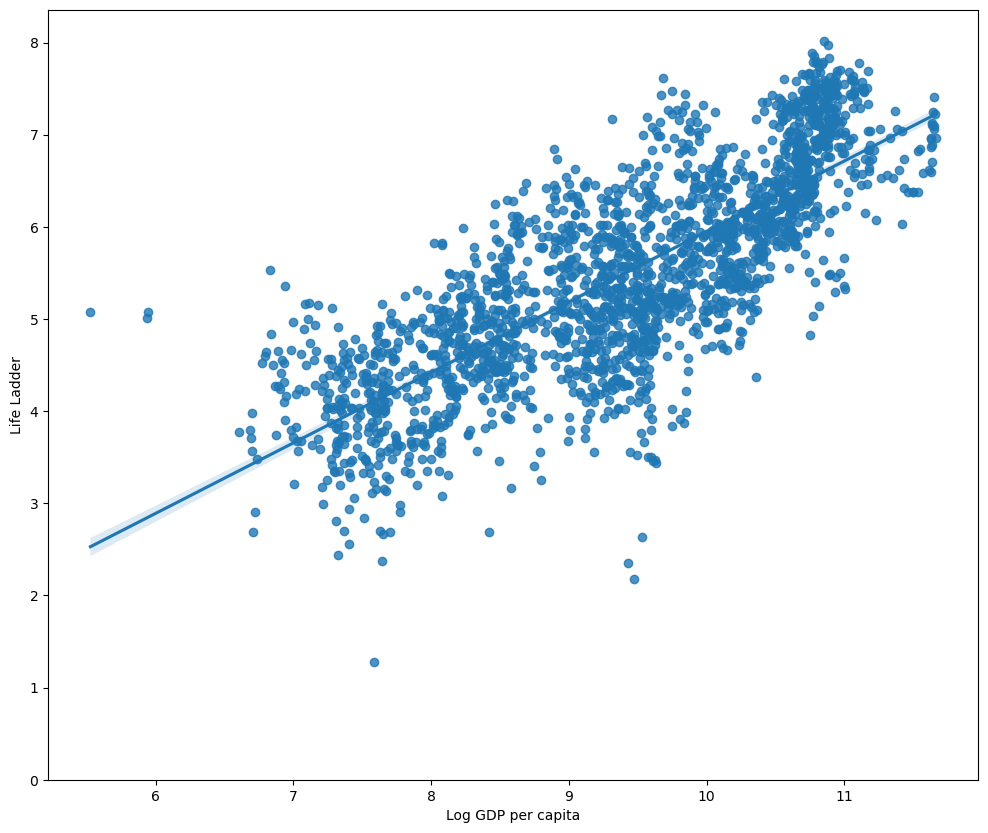

In [28]:
# Let's visulalize 'Log GDP per capita' as potential predictor variable of 'Life Ladder'

width = 12
height = 10

plt.figure(figsize=(width,height))
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df)
plt.ylim(0,)

We can see from the plot that Lif Ladder is positively correlated to Log GDP per capita since the gression slope is positive.
The scattered data is not to far from the line, the linear model might be the best model for this data. And can verify the anwer with method .corr()

### Residual Plot
A good way to visualize the variance of the data. The difference between the observed value(y) and the predicted value (Yhat) is called the residual(e). When we look at a regression plot the residual is the distance of the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals: if the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data(randomly spread out around the x-axis means that the variance is constant, and thus linear model is a good fit). In the other word, if the residual plot shows a romdom pattern with no obviouse trend then the model assumptions are met, and we can move on to evaluating the performance of the model using metrics such as R-squared or adjust R-squared.

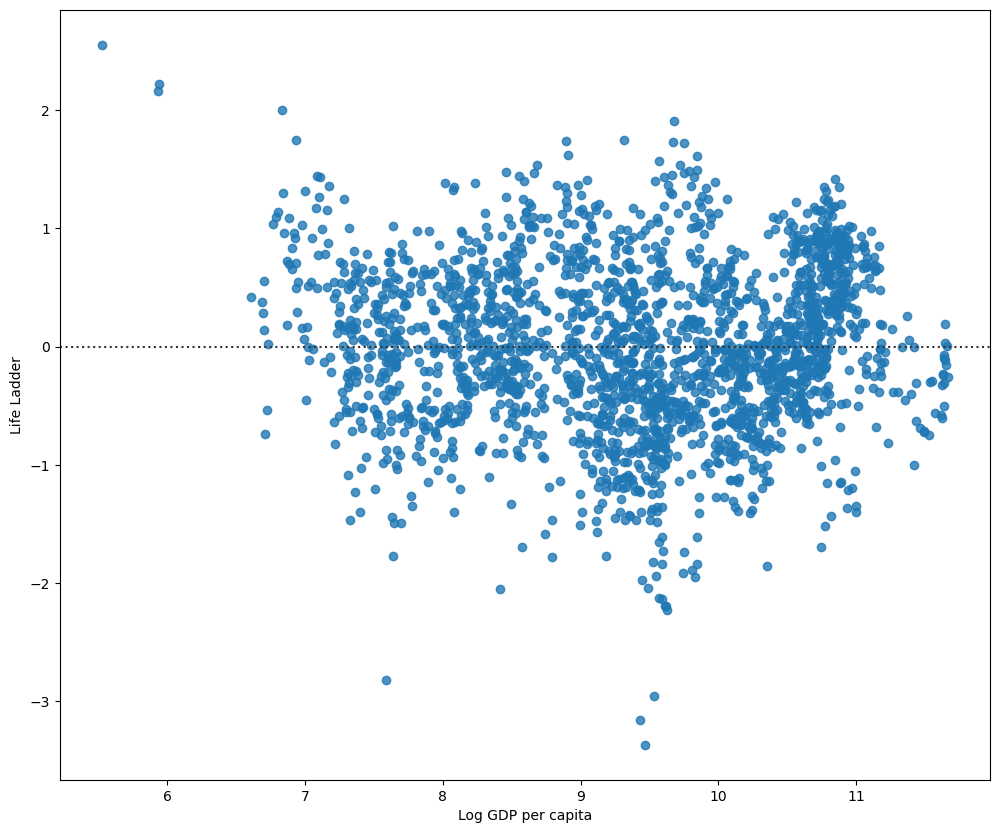

In [29]:
width = 12
height = 10

plt.figure(figsize=(width,height))
sns.residplot(x='Log GDP per capita', y='Life Ladder', data=df)
plt.show()

### Multiple Linear Regression

It is way to visualize a model of Multiple Linear Regression (Cannot visualize with regresstion or residual plot). One way to look at the fit of model is by looking at the distribution plot, looking at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [30]:
# Let's make a prediction

Y_hat = lm_multi.predict(Z)  #Z from the multiple linear regression estimation
Y_hat[0:4]

array([3.16880901, 3.56470018, 3.57394549, 3.51089081])

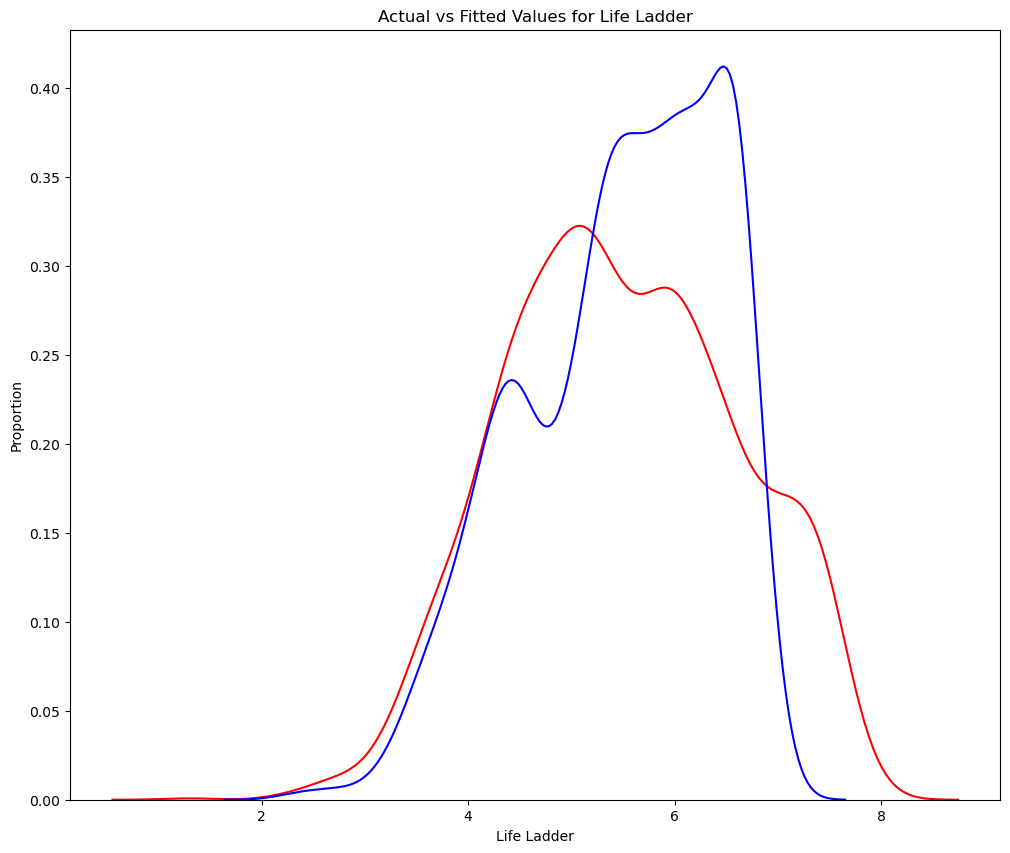

In [31]:
plt.figure(figsize=(width,height))

ax1 = sns.kdeplot(df['Life Ladder'], color='r', label='Actual Value')   #distplot with hist=False changed to kdeplt
sns.kdeplot(Y_hat, color='b', label='Fitted Values', ax=ax1)  
#use y_hat, predicted model of ladder (by Log GDP per capita) # and use the same axis with ax1(actual value)

plt.title('Actual vs Fitted Values for Life Ladder')
plt.xlabel('Life Ladder')
plt.ylabel('Proportion')

plt.show()
plt.close()

After see model of linear regression model, we fitting a polynimial model regression to see if it improves the model's performance

## 3. Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

eg. 

Quadratic-2nd order: Yhat = a + b1X + b2X^2
Cubic - 3rd Order: Yhat = a + b1X + b2X^2 + b3X^3
Higher-Oreder: Y = a + b1X +b2X^2 + b3X^3...

If the linear model didn't provide the best fit while using 'Log GDP per capita', truing using a polynomial model instead.

In [32]:
# use the function to plt data

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price-Log GDP per capita')
    
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Life Ladder of the report')
    
    plt.show()
    plt.close()

In [33]:
# Let's get the variables

x = df['Log GDP per capita']
y = df['Life Ladder']

In [34]:
# Let's fit the polynomial of the 3rd order (cubic)

f = np.polyfit(x, y, 3) #fit the polynomial 
p = np.poly1d(f) #display the polynomial funtion
print(p)

          3          2
-0.01304 x + 0.4606 x - 4.361 x + 16.49


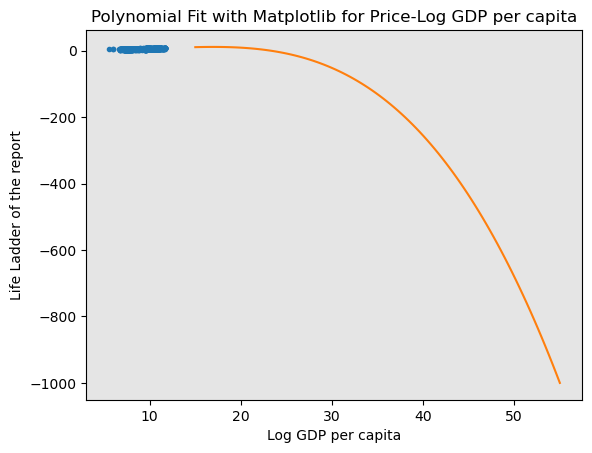

In [35]:
# Plot function

PlotPolly(p, x, y, 'Log GDP per capita')

In [40]:
#check it performance using residual analysis
from sklearn.preprocessing import PolynomialFeatures

pr_r = PolynomialFeatures(degree=2)
Z_pr_r = pr_r.fit_transform(df[['Log GDP per capita']])

poly2 = LinearRegression()
poly2.fit(Z_pr_r, y)

LinearRegression()

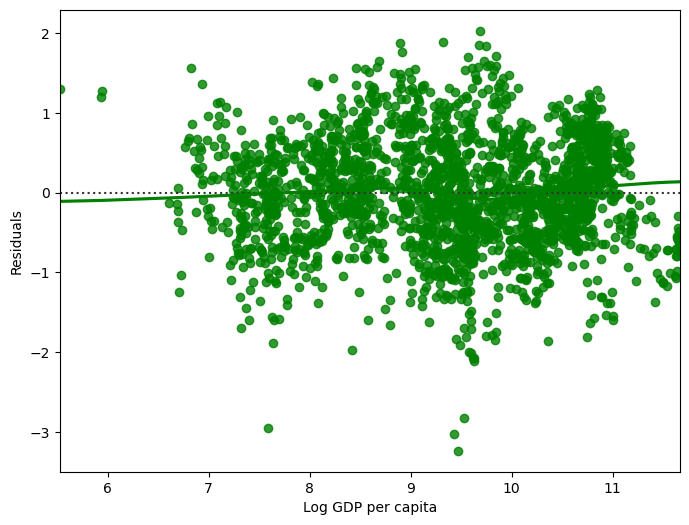

In [41]:
# After training the polynomial regression model, we can check its performance using residual analysis

width = 8
height = 6

plt.figure(figsize=(width,height))

y_poly2_hat = poly2.predict(Z_pr_r)
residual_poly = y - y_poly2_hat

sns.residplot(x=df[['Log GDP per capita']], y=residual_poly, lowess=True, color='g')
plt.xlabel('Log GDP per capita')
plt.ylabel('Residuals')
plt.show()


### The analytical expression for Multivariate Polynomial function gets complicated.
For example, the expression of second-order polynomial with two variables is given by:

Yhat = a + b1X1 + b2X2 + b3X1X2 +b4X1^2 + b5X2^2


In [42]:
# we can transform a polynomial transform on multiple features, importing this module

from sklearn.preprocessing import PolynomialFeatures

In [43]:
# create a PolynomialFatures object of degree 2

pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [44]:
Z_pr = pr.fit_transform(Z)

In [45]:
Z.shape  # there 2178 samples and 3 features in the original data

(2178, 3)

In [46]:
Z_pr.shape # there 2178 samples and 10 features after transformation

(2178, 10)

### Pipeline
Data Pipelines simplify the steps of precessing the data. We use the module Pipeline to create a pipeline and use StandardScaler as a step in our pipeline.

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
# Create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor

Input = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [49]:
# Input the list as an argument to the pipeline constructor

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [50]:
Z = Z.astype(float)
pipe.fit(Z,y)  #z is multiple linear regression, y is df['Life Ladder']

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

ypipe = pipe.predict(Z)
ypipe[0:4]

array([3.96777873, 4.09334322, 4.09106067, 4.05521366])

In [52]:
# Or
Input = [('scale',StandardScaler()), ('model',LinearRegression())]

pipe.fit(Z,y)

ypipe = pipe.predict(Z)
ypipe[0:10]

array([3.96777873, 4.09334322, 4.09106067, 4.05521366, 4.05919316,
       3.9967512 , 4.04958467, 4.04234042, 4.08177805, 3.95267735])

## 4. Measure for In-Sample Evaluation

When evaluating models, not only to visualize the result, we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistic are :

R^2/R-squared: also known as the coefficiant of determination, is a measure to indicate how close the data is to the fitted regression line. The value is the percentage of variation of the response variable(y) that is explained by linear model(how well the model fit the data).

Mean Squared Error (MSE): The Mean Squared Error measures the average of the squares of errors. This is, the difference between actual value(y) and the estimated value(yhat).



### Model 1: Simple Linear Regression

In [53]:
lm.fit(X,Y) #X='Log GDP per capita', Y=Life Ladder

# Find R^2
print('The R-square is:', lm.score(X,Y))

The R-square is: 0.6167631308753494


We can say that about 61.676 of the variation of Life Ladder is explaned by this simple linear model 'Log GDP per capita'.

In [54]:
# Can predict the output i.e 'yhat' using the predict method, where X is the input variable

Yhat = lm.predict(X)
print('The output of the first four predicted value is:', Yhat[0:4])

The output of the first four predicted value is: [3.92326428 4.04429809 4.12480918 4.09984134]


In [55]:
# Find MSE
# import the module metrics

from sklearn.metrics import mean_squared_error

In [56]:
# Compare the predicted method with the actual result

mse = mean_squared_error(df['Life Ladder'], Yhat)
print('The mean square error of Life Ladder and predicted value is', mse)

The mean square error of Life Ladder and predicted value is 0.48566533251333815


### Model 2: Multiple Linear Regression

In [57]:
# fit the model
lm_multi.fit(Z, df['Life Ladder'])

#find R^2
print('The R-square is:' , lm_multi.score(Z, df['Life Ladder']))

The R-square is: 0.6894378182418119


In [58]:
# produce a prediction

Y_prediction_multifit = lm_multi.predict(Z)
Y_prediction_multifit[0:4]

array([3.16880901, 3.56470018, 3.57394549, 3.51089081])

In [59]:
# Compare the predicted results with the actual results

print('The mean square error of Life Ladder and predicted value using mulifit is', \
     mean_squared_error(df['Life Ladder'], Y_prediction_multifit))

The mean square error of Life Ladder and predicted value using mulifit is 0.3935667401055816


### Model 3: Polynomial Fit

Calculate the R^2

Import the funtion from module matrics

In [60]:
from sklearn.metrics import r2_score

In [61]:
# apply the function to get R^2

r_squared = r2_score(y, p(x)) #x = df['Log GDP per capita'] , y = df['Life Ladder'], p(x) polynimial
print('The R-square value is:', r_squared)

The R-square value is: 0.6340584064787202


In [62]:
#MSE

mse_poly = mean_squared_error(df['Life Ladder'], p(x))
print('The mean square error of Life Ladder and predicted value is', mse_poly)

The mean square error of Life Ladder and predicted value is 0.4637475149609541


We can say that about 63.405% of the variation of Life Ladder is explained by this polynomial fit.

## 5. Prediction and Decision Making

### Prediction

In the previous, we train the model using the mothod fit. Now we will use the method predict to produce a prediction .

In [63]:
#create new input

new_input = np.arange(1, 100, 1).reshape(-1,1)

In [64]:
# Create a new input

lm.fit(X,Y)
lm

LinearRegression()

In [65]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.93432203, -0.16939794,  0.59552615,  1.36045024,  2.12537433])

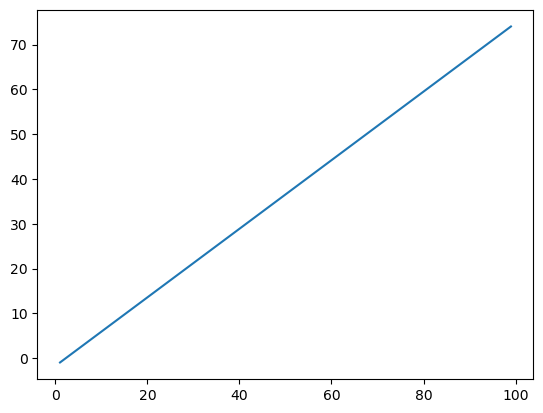

In [66]:
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

Determine what is a good model fit? the higher R-squared value and the smallest MSE value is a better fit.

Simple Linear Regression: Using Log GDP per capita as Predictor Variable of Life Ladder
- R-Squared: 0.6167631308753493
- MSE: 0.48566533251333827

Multiple Linear Regression: Using as Predictor Variable of Life Ladder
- R-Squared: 0.6894378182418119
- MSE: 0.3935667401055816

Polynomial Fit: Using Log GDP per capita as Predictor Variable of Life Ladder
- R-squared: 0.6340584064787202
- MSE: 0.4637475149609543

#### Simple Linear Regression Model(SLR) vs Multiple Linear Regression(MLR)
- MSE: SLR is 0.48566533251333827 whlie MLR is 0.3935667401055816. The MSE of MLR is much smaller
- R-squared: SLR at 0.6167631308753493 is smaller compared with MLR at 0.6894378182418119

With R-squared combined with MSE, MLR seems like the better model compared with SLR

#### Simple Linear Regression Model(SLR) vs Polynomial Fit
- MSE: MSE of Polynomial is smaller than SLR
- R-squared: R-squared for Poplnimial Fit is larger than SLR

Since Polynomial Fit resulted in lower MSE and Higher R-squared, we conclude that this was a better fit than SLR for predicting Life Ladder with Log GDP per capita

#### Multiple Linear Regression(MLR) vs Polynomial Fit
- MSE: The MSE for the MLR is smaller than Polynimial Fit
- R-squared: The R-squared for MLR is larger than Polynimial Fit

### Conclusion
Comparing with three models, the MLR is the best model to Life Ladder from the dataset. The result make sense since we have 11 variables in total and we know that more than one of those variables are potential predictors of the final Life Ladder.

###  <font color='blue'>- - - Answer for Question 2 What Regression Model suit to predicting Life Ladder? <font>
It is Multiple Linear Regression based on above conclusion.

# Model Evaluation and Refinement

## Functions for Plotting

In [67]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    heigth = 10
    plt.figure(figsize=(width, heigth))
    
    ax1 = sns.kdeplot(RedFunction, color='r', label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color='b', label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Life Ladder')
    plt.ylabel('Proportion')
    
    plt.show()
    plt.close()

In [68]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data
    #testing data
    #lr: linear regression object
    #poly-transform: Polunomial transformation object
    xmax = max([xtrain.values.max(), xtest.values.max()])
    
    xmin = min([xtrain.values.max(), xtest.values.max()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label='Traning Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-1000, 6000])
    plt.ylabel('Life Ladder')
    plt.legend()
    

## Part 1: Training and Testing

Split the data into Trainning and Testing

In [69]:
# place the target Lif Ladder in a separate data frame y_data

y_data = df['Life Ladder']
y_data.head()

0    3.723590
1    4.401778
2    4.758381
3    3.831719
4    3.782938
Name: Life Ladder, dtype: float64

In [70]:
# drop price column in dataframe x_data

x_data = df.drop('Life Ladder', axis=1)
x_data.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [71]:
# Now, we randomly split our data into training and testing data using funtion train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print('number of test samples :', x_test.shape[0])  #shape0=rows, 1=columns
print('number of training samples :', x_train.shape[0])

number of test samples : 218
number of training samples : 1960


In [72]:
#import LinearRegression from module linear_model

from sklearn.linear_model import LinearRegression

In [73]:
# create linear regression object

lre=LinearRegression()

In [74]:
# fit the model using the feature Log GDP per capita

lre.fit(x_train[['Log GDP per capita']], y_train)   #use train to fit model

LinearRegression()

In [75]:
#Let's calculate the R^2 on the test data

lre.score(x_test[['Log GDP per capita']], y_test) #with test data to find R^2

0.5677630563942548

In [76]:
lre.score(x_train[['Log GDP per capita']], y_train) #with train data to find R^2

#can see that R^2 is much smaller using the test data compared to the traing data

0.6230654624674316

Sometimes you do not have suffucient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

## Cross-Validation Score

An average performance of model cross all the partiyions of the dataset which is a more reliable estimate model performance than a single partition like R-squared vecause it averages out the variability due to the ramdom partitionning of the data. We use Cross-Validation to evaluate the performance of the model on the training data. This allow us to tune the hyperparameters of the model to achieve better preformance. And also estimate the model's performance of the test data

In [77]:
# import model_selection from the module cross_val_score

from sklearn.model_selection import cross_val_score

In [78]:
# Input the object, the feature ('Log GDP per capita'), the and taget data (y_data).
# The parameter 'cv' determines the number of folds, 4.

Rcross = cross_val_score(lre, x_data[['Log GDP per capita']], y_data, cv=4)

Rcross  #The defult scoring is R^2. Each element in the array has the average R^2 value for the fold

array([0.62497912, 0.48906836, 0.59641591, 0.69353255])

In [79]:
# Can calculate the average and standard deviation of our estimate

print('The mean of the folds are', Rcross.mean(), 'and the standard deviation is', Rcross.std())

The mean of the folds are 0.600998986024248 and the standard deviation is 0.07363249499594897


In [80]:
# Can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'

-1 * cross_val_score(lre, x_data[['Log GDP per capita']], y_data, cv=4, scoring='neg_mean_squared_error')

array([0.5705965 , 0.53395955, 0.42599949, 0.44162224])

In [81]:
# Can use the function 'cross_var_predict' to predict output. 
# This splits up the data into the specific number of folds, one fold for testing and the others for training

# Import function

from sklearn.model_selection import cross_val_predict

In [82]:
# Input the feature 'Log GDP per capita' anf the target y_data.
# The parameter 'cv' determines the number of folds, 4.

yhat = cross_val_predict(lre, x_data[['Log GDP per capita']], y_data, cv=4)
yhat[0:5]

array([3.98580547, 4.10115264, 4.17788101, 4.15408626, 4.21185613])

## Part 2: Overfitting, Underfitting and Model Selection

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context

In [83]:
# Let's create Multiple Linear Regression objects and train the model using
# 'Log GDP per capita', 'Social support' and ''Healthy life expectancy at birth'' as features

lr = LinearRegression()
lr.fit(x_train[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']], y_train)  #fit with train data

LinearRegression()

In [84]:
# Prediction using training data

yhat_train = lr.predict(x_train[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
yhat_train[0:5]

array([4.91066022, 5.74262197, 4.08525183, 6.58359292, 5.74883379])

In [85]:
# Prediction using test data

yhat_test = lr.predict(x_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
yhat_test[0:5]

array([4.30462038, 6.19357102, 5.35558053, 5.65872412, 4.39619023])

Let's perform some model evaluation using traing and testing data separately

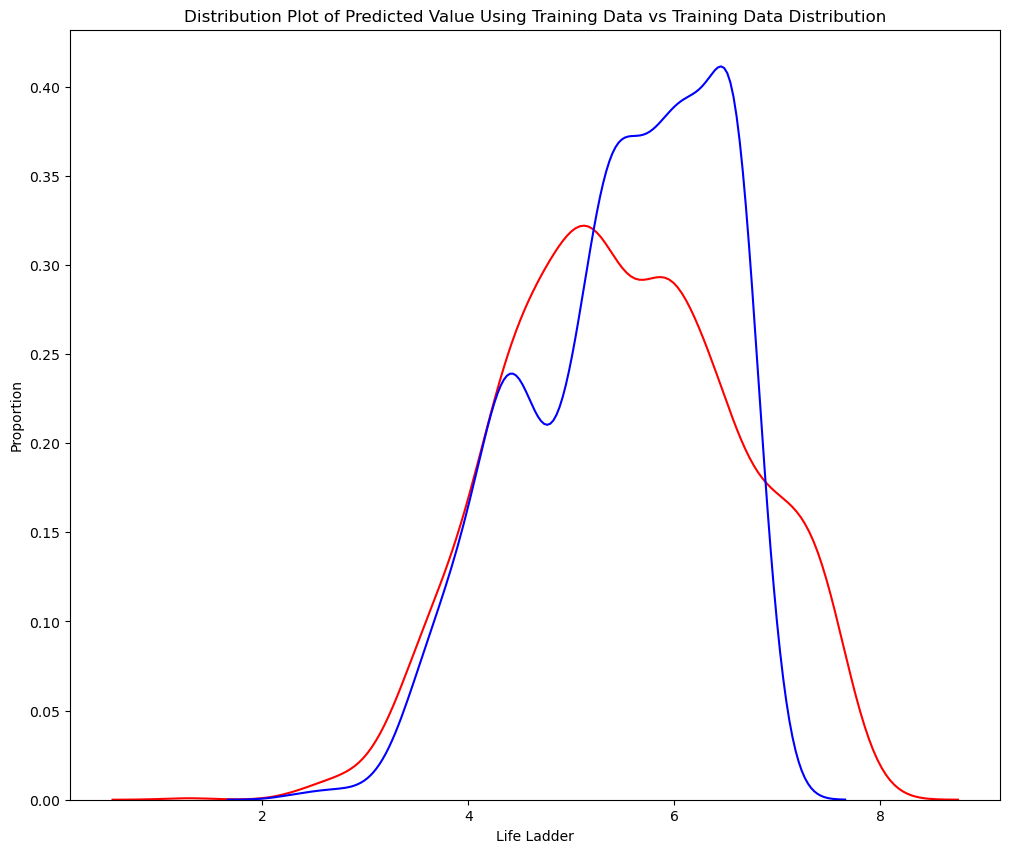

In [86]:
# Examine the distribution of the predicted values of the training data

Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, 'Actual Values (Train)', 'Predicted Values (Train)', Title)

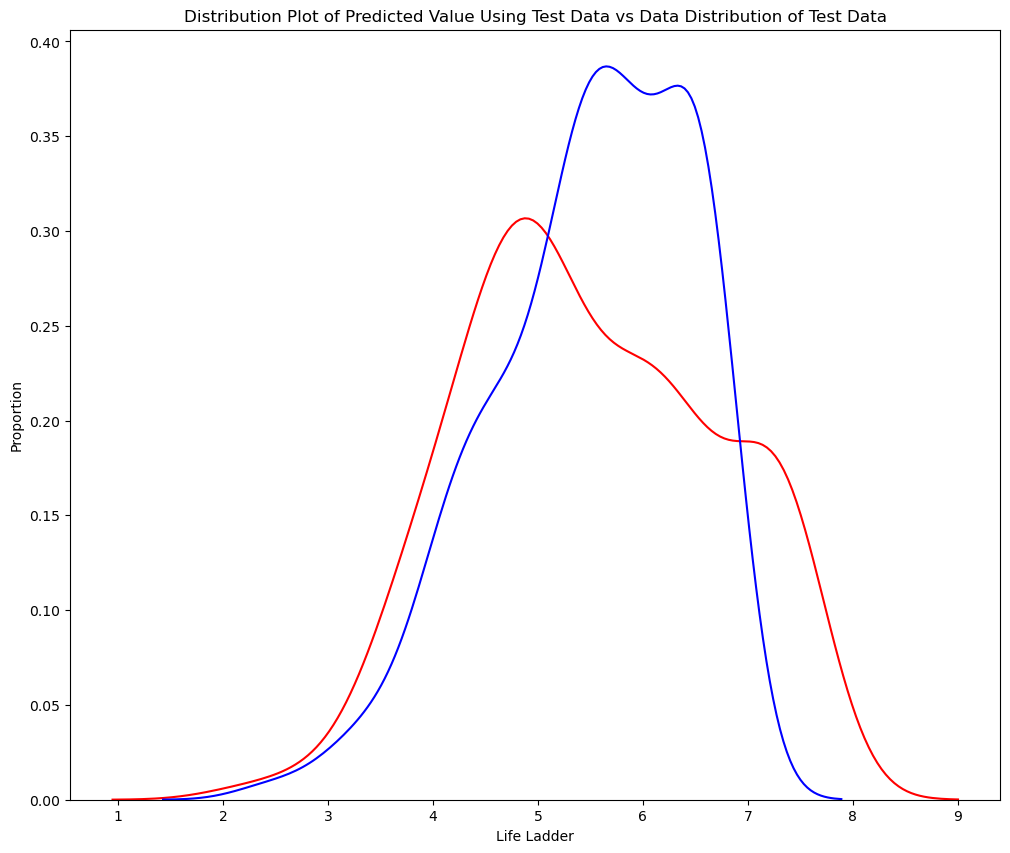

In [87]:
# What happen when the model encounters new data from testing dataset

Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

#the distribution of predict values is much different from the actual target values

Comparing Figure of Traning and Testing, the distribution of Training is much better at fitting data. Let's see if polynomial regression also exhibits a drop inprediction accuracy when analysing the test dataset.

In [88]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when tesing model using test set, model does not perform as well since it modelling noise, not the underlying process that generated the relationship. Let's create apolynimial model.

In [89]:
#use 55% of the data for traning and the rest for testing

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [90]:
#perfrom a degree 5 polynomial transformation on the feature Log GDP per capita'

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['Log GDP per capita']])
x_test_pr = pr.fit_transform(x_test[['Log GDP per capita']])
pr

PolynomialFeatures(degree=5)

In [91]:
# create linear regression model and train it

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [92]:
# see the output of the model

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([4.34719876, 5.261058  , 4.61923462, 6.70948339, 4.08336521])

In [93]:
# take five predicted values and compare it to the actual targets

print('Predictedted values:', yhat[0:4])
print('True values:', y_test[0:4].values)

Predictedted values: [4.34719876 5.261058   4.61923462 6.70948339]
True values: [4.18445063 5.83951855 5.08285141 6.61954975]


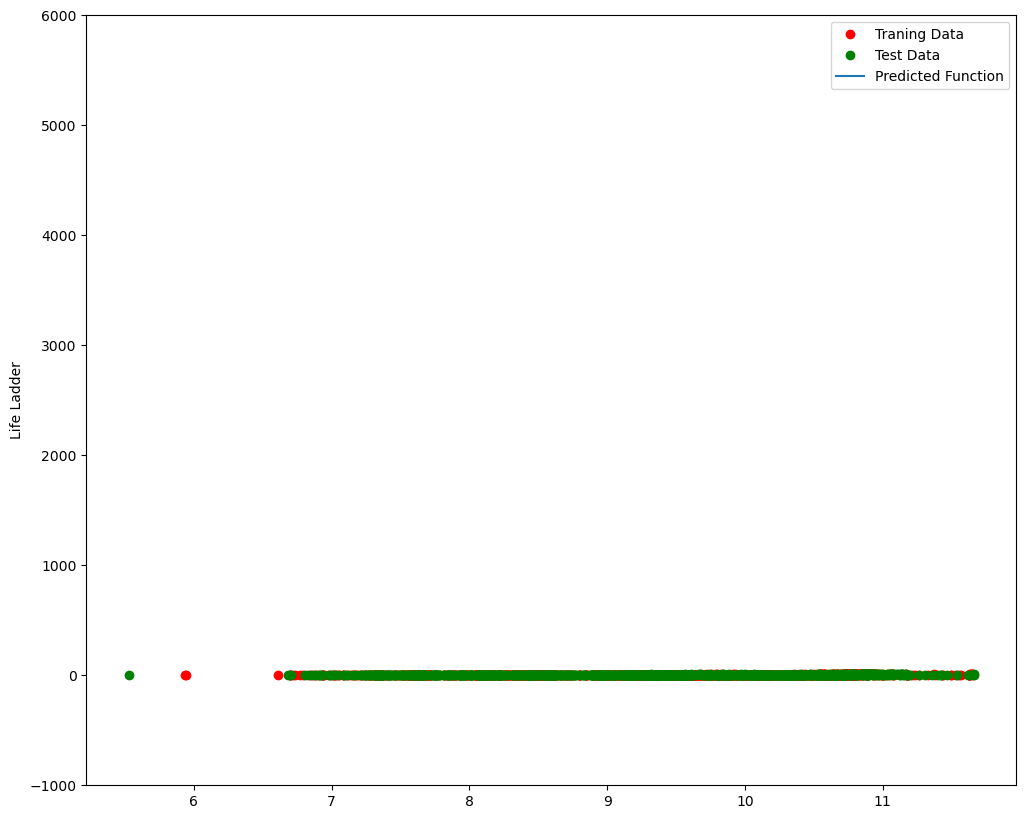

In [94]:
# use function 'PollyPlot' that we defined at the beginning of the lab to display 
# the traning data, testing data, and the predicted function

PollyPlot(x_train[['Log GDP per capita']], x_test[['Log GDP per capita']], y_train, y_test, poly, pr)

In [95]:
# R^2 of the training data

poly.score(x_train_pr, y_train)

0.6614067870763365

In [96]:
# R^2 of the test data

poly.score(x_test_pr, y_test)

0.6135504970641591

The lower R^2 is the worse model and if it is a negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2')

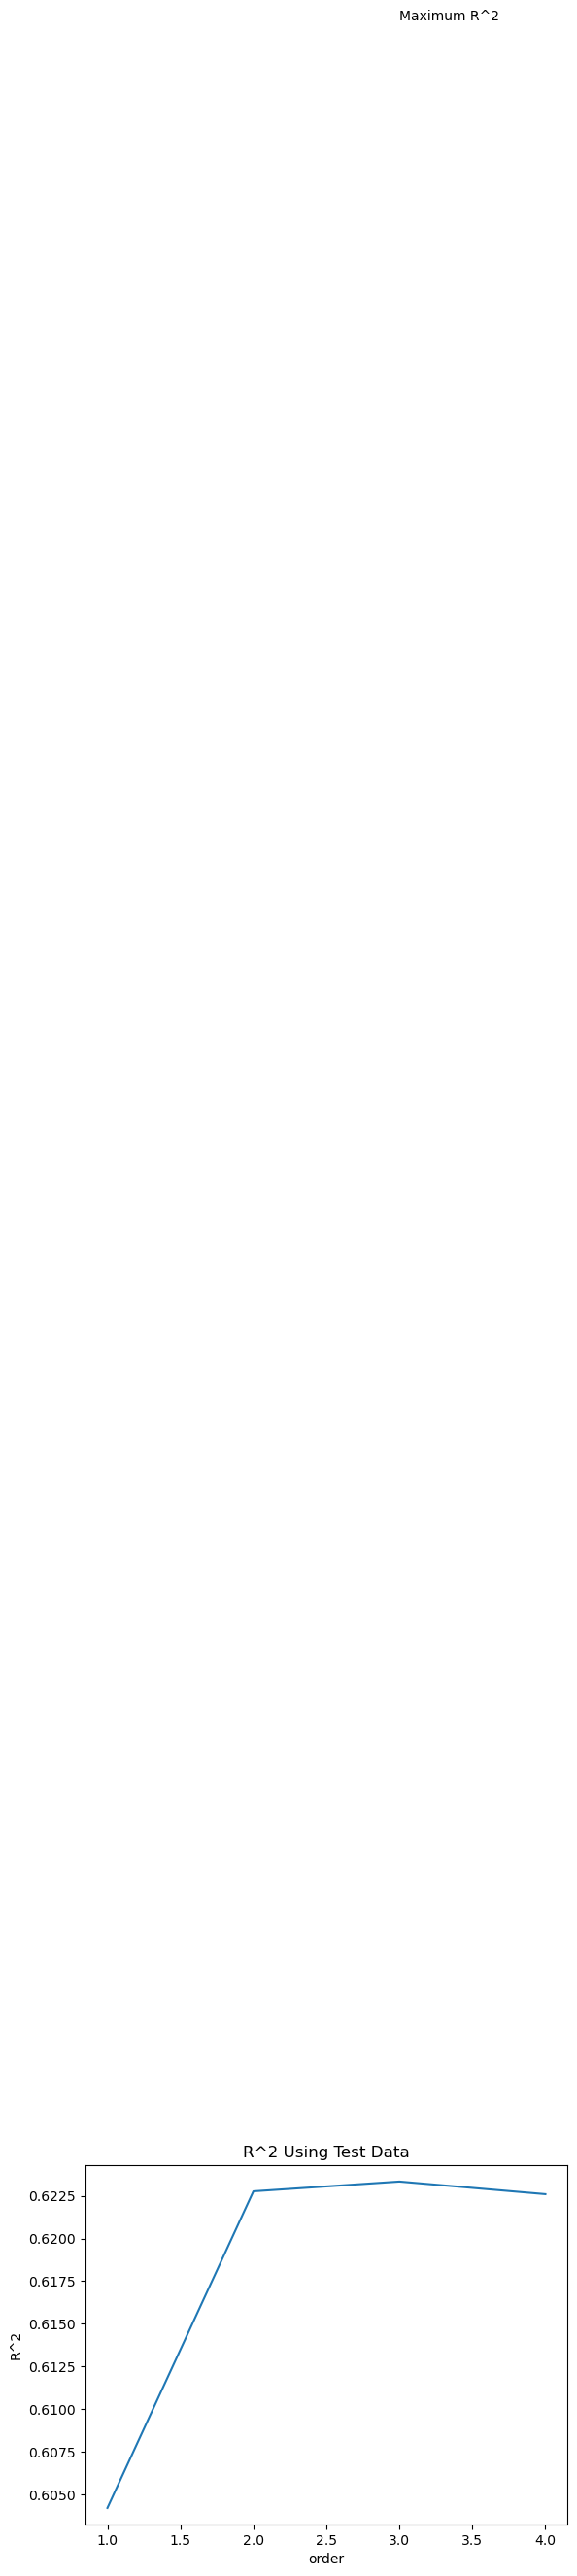

In [97]:
# See how the R^2 changes on the test data for differrent order polynomials and then plot the results
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Log GDP per capita']])
    
    x_test_pr = pr.fit_transform(x_test[['Log GDP per capita']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

The R^2 dramatically increses until order 2 and then gradually climbs into 3 before slightly decrease until degree 4

In [98]:
# Create a function

def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['Log GDP per capita']])
    x_test_pr = pr.fit_transform(x_test[['Log GDP per capita']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[['Log GDP per capita']], x_test[['Log GDP per capita']], y_train, y_test, poly, pr)

In [99]:
# The interface allow we to experiment with different polynomial prders and different amounts of data
from ipywidgets import interact

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Perform Polynomial transformations with more than one feature

In [100]:
# Perform Polynomial transformations with more than one feature

pr1 = PolynomialFeatures(degree=2)

In [101]:
# Transform then training and testing smaples for the features 'Log GDP per capita', 'Social support', 'Social support'

x_train_pr1 = pr1.fit_transform(x_train[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
x_test_pr1 = pr1.fit_transform(x_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])

In [102]:
# How mana dimention of the new feature

x_train_pr1.shape

(1197, 10)

In [103]:
# Create a linear regression model

poly1 = LinearRegression().fit(x_train_pr1, y_train) #train the object bu fit

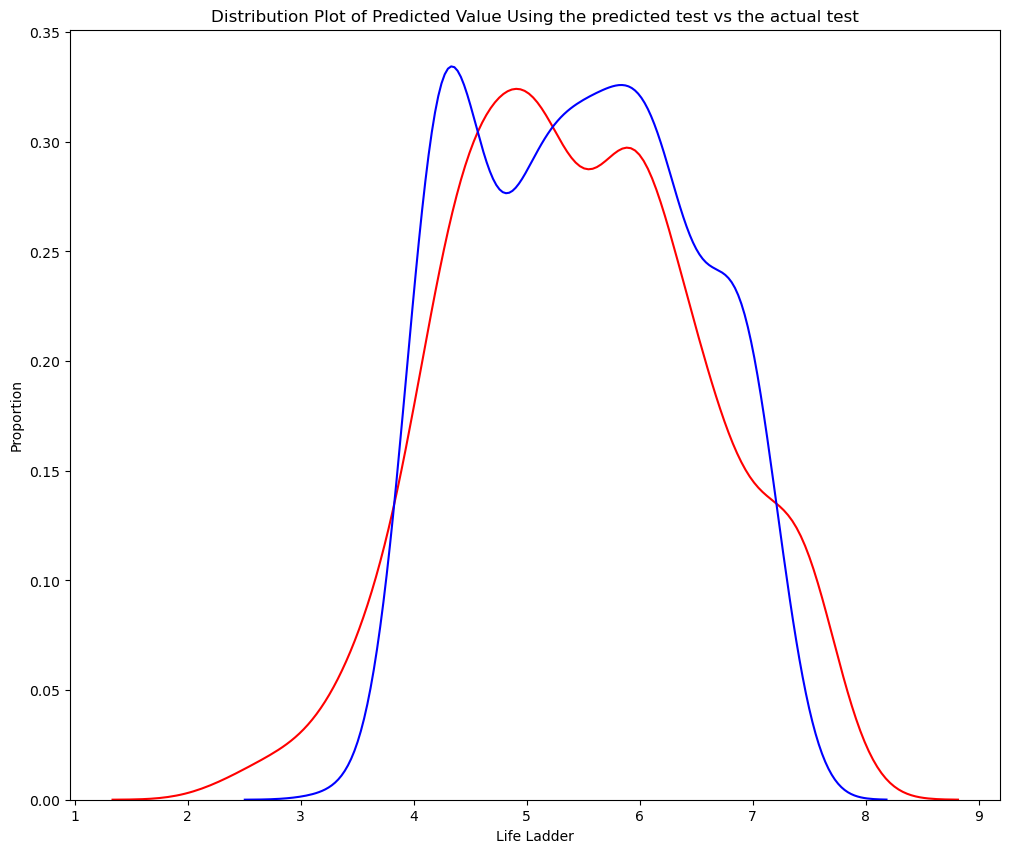

In [104]:
# Predict an output on polynomial features, then display the distribution of the predicted test vs the actual test

yhat_test1 = poly1.predict(x_test_pr1)

Title = 'Distribution Plot of Predicted Value Using the predicted test vs the actual test'

DistributionPlot(y_test, yhat_test1, 'Actual Values (Test)', 'Preducted Values (Test)', Title)


## Part 3: Ridge Regression

We will review Ridge Regression and see how the parameter alpha changes the model. Note that our test data will be used as validation data.

In [105]:
# Perform a degree two polynimial transformation on our data

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
x_test_pr = pr.fit_transform(x_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])

In [106]:
#import Ridge

from sklearn.linear_model import Ridge

In [107]:
# Create a Ridge Regression Object, setting the regularization parameter (alpha) to 0.1

RidgeModel = Ridge(alpha=1)

In [108]:

# Like regular regression, can fit the model using the method fit

RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [109]:
# Similarly, can obtain a prediction

yhat = RidgeModel.predict(x_test_pr)

In [110]:
# Compare the first five predicted samples to our test set

print('predicted: ', yhat[0:4])
print('test set : ', y_test[0:4].values)

predicted:  [4.35890191 5.68843632 3.89449265 6.84736471]
test set :  [4.18445063 5.83951855 5.08285141 6.61954975]


In [111]:
# We can select the value of alpha that minimizes the test error.
# To do so, we can use a for loop. We have also created a progess bar to see how many iterations we have completed so far.

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({'Test Score': test_score, 'Train Score' : train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.43it/s, Test Score=0.69, Train Score=0.712]


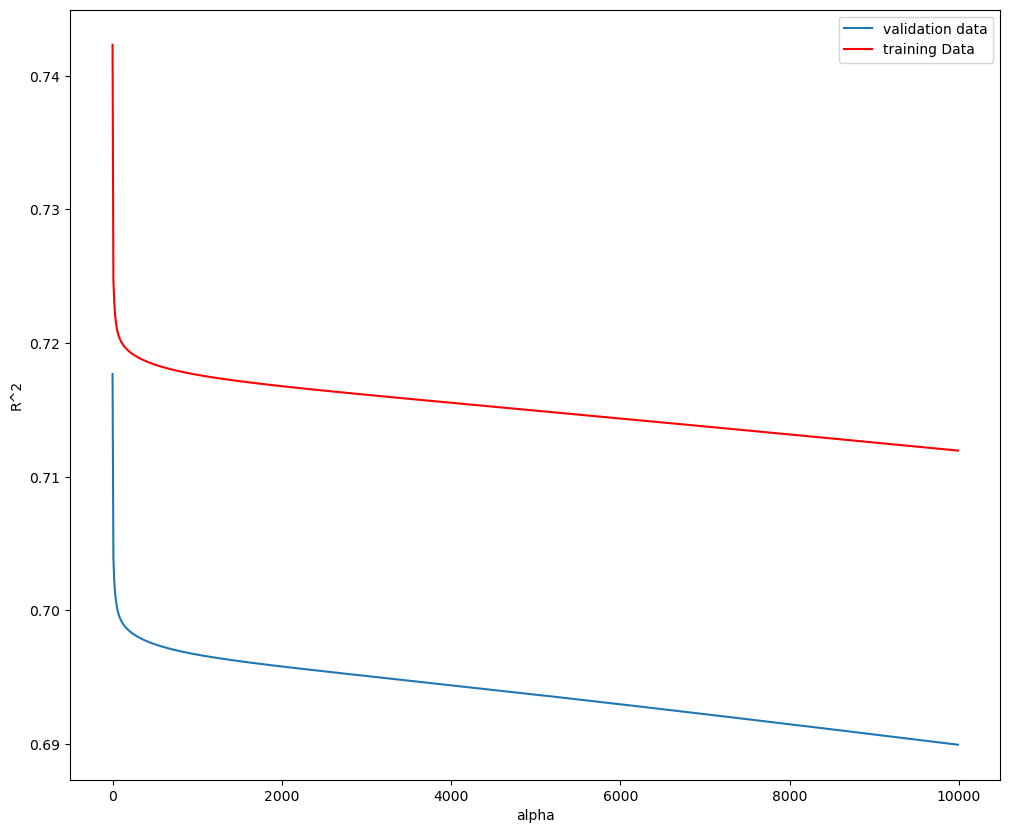

In [112]:
# We can plot out the value of R^2 for different alphas

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Here the model is built and tasted on the same data, so the training and test are the same.

The red line in the above figure represents the R^2 of the training data. As alpha increases the R^2 decrease. Therefore, as alpha increases, the model performs worse on the training data.

The blue line represents the R^2 on the validation data. As the value for alpha increase, the R^2 in decrease also.

In [113]:
# Compute the mean square error and R-squared value on test data polynomial feature

mse_R = mean_squared_error(y_test, yhat)
r2_R = r2_score(y_test, yhat)
print('mse polynimial features:', mse_R)
print('r-square polynimial features:', r2_R)


mse polynimial features: 0.3632862222850355
r-square polynimial features: 0.708782687579794


## Part 4: Grid Search
The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [114]:
# import

from sklearn.model_selection import GridSearchCV

In [115]:
# a dictionary of parameter values

parameters1 = [{'alpha': [0.001, 0.1, 1, 10,100, 1000,10000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [116]:
# create a Ridge Regression object

RR = Ridge()
RR

Ridge()

In [117]:
# create a ridge grid search object

Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [118]:
# Fit the model

Grid1.fit(x_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [119]:
# best parameter

BestRR_para = Grid1.best_params_
BestRR_para

{'alpha': 1}

In [120]:
#best model

BestRR_es = Grid1.best_estimator_
BestRR_es

Ridge(alpha=1)

In [121]:
# We now test our module on the test data

BestRR_es.score(x_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']], y_test)

0.6799193299735582

In [122]:
# Make prediction on the test using the best model
y_pred = BestRR_es.predict(x_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
y_pred[0:4]

array([4.30715067, 5.70449225, 4.01100825, 6.66067848])

In [123]:
r2_RR = r2_score(y_test, y_pred)
mse_RR = mean_squared_error(y_test, y_pred)


print('The best hyperparameters:', BestRR_para)
print('The best model:', BestRR_es)
print('mse polynimial features:', mse_RR)
print('r-square polynimial features:', r2_RR)

The best hyperparameters: {'alpha': 1}
The best model: Ridge(alpha=1)
mse polynimial features: 0.39929252994610404
r-square polynimial features: 0.6799193299735582


### <font color='blue'>- - - Answer for Question 3 : How to make a prediction on new data? </font>

- Choosing Multiple Linear Regression Model to predict as following:

In [124]:
# Select the predictor variables and the response variable

X_data = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']]
y_data = df['Life Ladder']

In [125]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [126]:
# Fit the multiple linear regression model to the training data

model = LinearRegression().fit(X_train, y_train)

In [127]:
# Make predictions on the test data

y_pred = model.predict(X_test)

In [128]:
# Evaluate the model's performance using R-squared and mean squared error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean squared error:", mse)

R-squared: 0.6697849999215338
Mean squared error: 0.43073252732347705


Find multicollinearity which is the situation where two or more predictor variables in a multiple linear regression model are highly correlated with each other. It can also make the estimates of the regression coefficients less stable and less reliable.

Uising variance inflation factor (VIF) to measure of how much the variance of the estimated regression coefficient is increased due to multicollinearity. A VIF of 1 means that there is no multicollinearity, while a VIF greater than 1 indicates some degree of multicollinearity.

In [129]:
# Check for multicollinearity using the variance inflation factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor  #variance_inflation_factor() function from the statsmodels.stats.outliers_influence module to calculate the VIF for each predictor variable. 
X_data = X_data.assign(const=1)   #adds a new column to the predictor matrix X with a constant value of 1 to include an intercept term in the linear regression model.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])]  # shape 1 to loop column
vif["features"] = X_data.columns
print(vif)

   VIF Factor                          features
0    3.731509                Log GDP per capita
1    1.890875                    Social support
2    3.065957  Healthy life expectancy at birth
3   87.725457                             const


A common rule of thumb is to remove any variables with a VIF value greater than 5. So, we will not remove any variable.

In [130]:
# Refine the model by removing the 'Healthy life expectancy' variable

X = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared after refinement:", r2)
print("Mean squared error after refinement:", mse)

R-squared after refinement: 0.6697849999215338
Mean squared error after refinement: 0.43073252732347705


In [131]:
#Try with new data

# Assume that we have new data with predictor variables 'Log GDP per capita', 'Social support'
new_data = pd.DataFrame({'Log GDP per capita': [7.0, 8.0], 'Social support': [0.7, 0.5], 'Healthy life expectancy at birth': [50.9, 53.0]})

# Use the model to make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print("Predicted Life Ladder for the new data point:", predictions)


Predicted Life Ladder for the new data point: [3.8533439  3.67736791]


In [132]:
new_data

,Log GDP per capita,Social support,Healthy life expectancy at birth
0,7.0,0.7,50.9
1,8.0,0.5,53.0


In [133]:
predictions

array([3.8533439 , 3.67736791])